In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/speed-dating/speed_data_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/speed-dating/speed_data_data.csv')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.head(10)

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,21.0,69487.0,2.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,0,21.0,69487.0,2.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
2,0,21.0,69487.0,2.0,lawyer,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0
3,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,0,21.0,69487.0,2.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0
5,0,21.0,69487.0,2.0,lawyer,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0,2.0
6,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,7.0,4.0,6.0,7.0,6.0,5.0,2.0
7,0,21.0,69487.0,2.0,lawyer,0,4.0,9.0,7.0,6.0,5.0,6.0,6.0,7.0,NaN
8,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,8.0,9.0,8.0,8.0,7.0,7.0,2.0
9,0,21.0,69487.0,2.0,lawyer,1,5.0,6.0,6.0,8.0,10.0,8.0,6.0,6.0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  8378 non-null   int64  
 1   age     8283 non-null   float64
 2   income  4279 non-null   float64
 3   goal    8299 non-null   float64
 4   career  8289 non-null   object 
 5   dec     8378 non-null   int64  
 6   attr    8176 non-null   float64
 7   sinc    8101 non-null   float64
 8   intel   8082 non-null   float64
 9   fun     8028 non-null   float64
 10  amb     7666 non-null   float64
 11  shar    7311 non-null   float64
 12  like    8138 non-null   float64
 13  prob    8069 non-null   float64
 14  met     8003 non-null   float64
dtypes: float64(12), int64(2), object(1)
memory usage: 981.9+ KB


In [6]:
df.isnull().sum()

gender       0
age         95
income    4099
goal        79
career      89
dec          0
attr       202
sinc       277
intel      296
fun        350
amb        712
shar      1067
like       240
prob       309
met        375
dtype: int64

In [7]:
# Handle missing values using the recommended method
df.fillna({
    'age': round(df['age'].mean()),
    'income': round(df['income'].median()),
    'goal': df['goal'].mode()[0],
    'career': 'Unknown',
    'attr': round(df['attr'].mean()),
    'sinc': round(df['sinc'].mean()),
    'intel': round(df['intel'].mean()),
    'fun': round(df['fun'].mean()),
    'amb': round(df['amb'].mean()),
    'shar': round(df['shar'].mean()),
    'like': round(df['like'].mean()),
    'prob': round(df['prob'].mean()),
    'met': df['met'].mode()[0]
}, inplace=True)

In [8]:
df = df.drop_duplicates()

In [9]:
df.to_csv('/kaggle/working/cleaned_data.csv', index=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


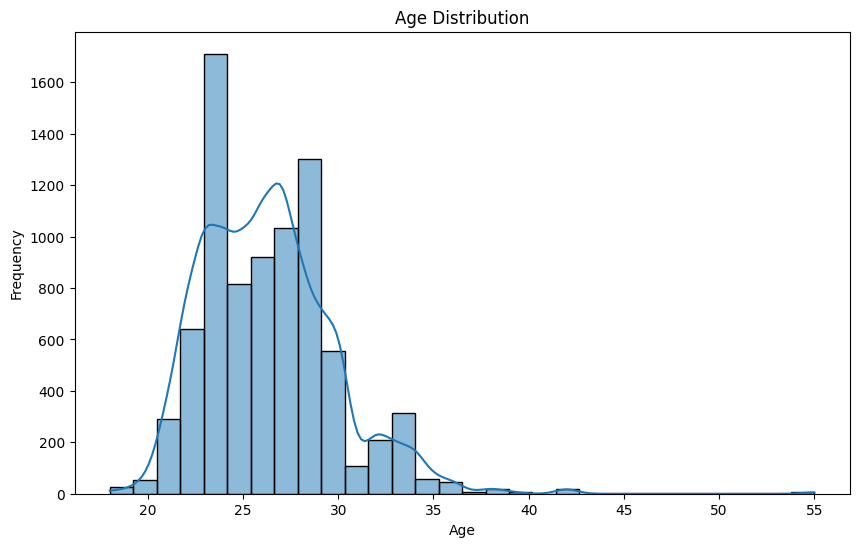

In [10]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

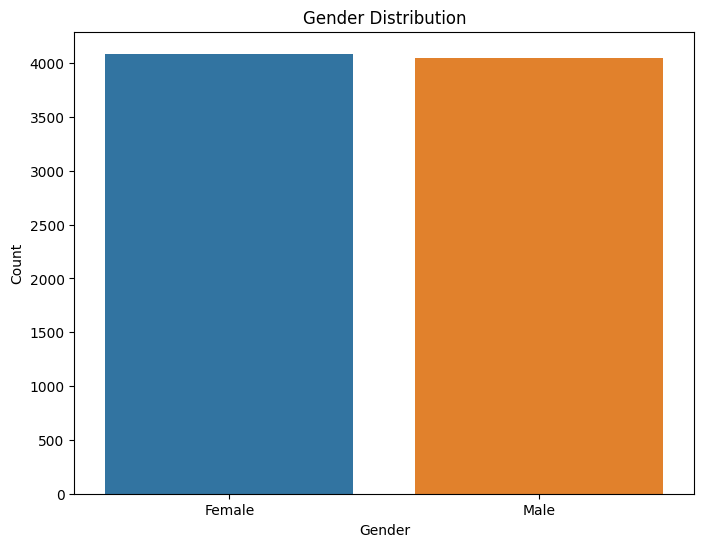

In [11]:
# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male']) #Assuming 0->female, 1->male
plt.show()

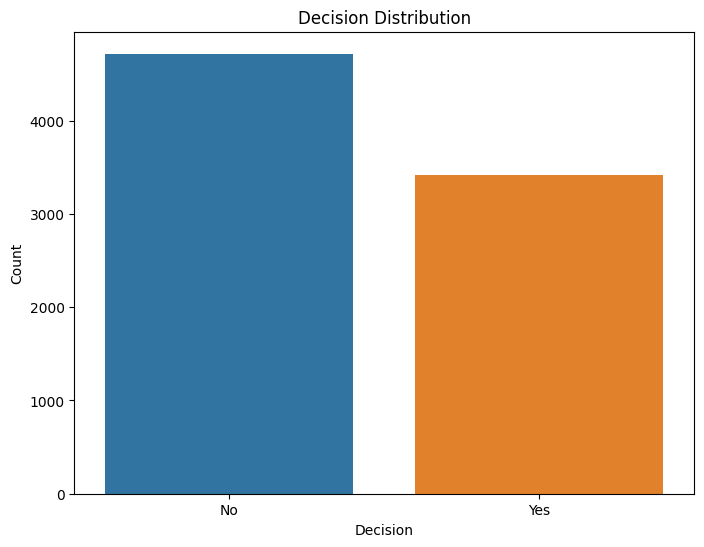

In [12]:
# Decision (dec) Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='dec', data=df)
plt.title('Decision Distribution')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

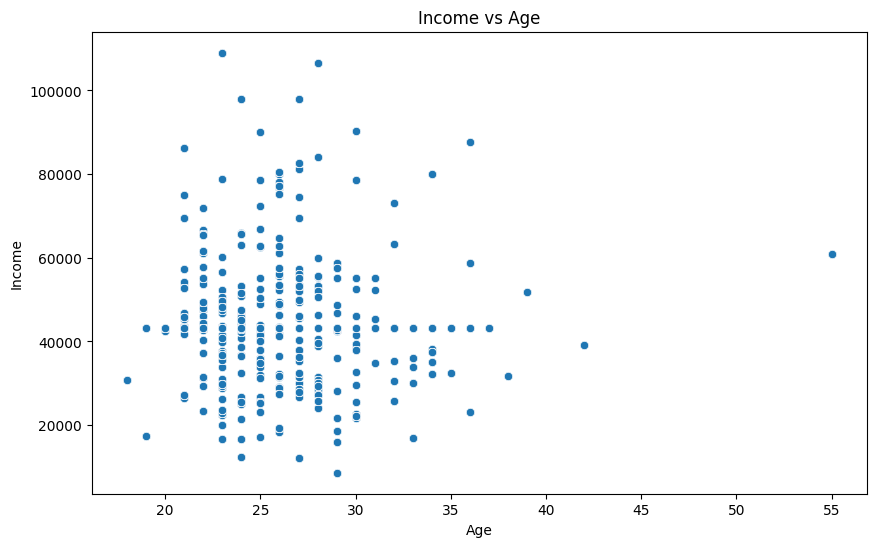

In [13]:
# Income vs Age Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', data=df)
plt.title('Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

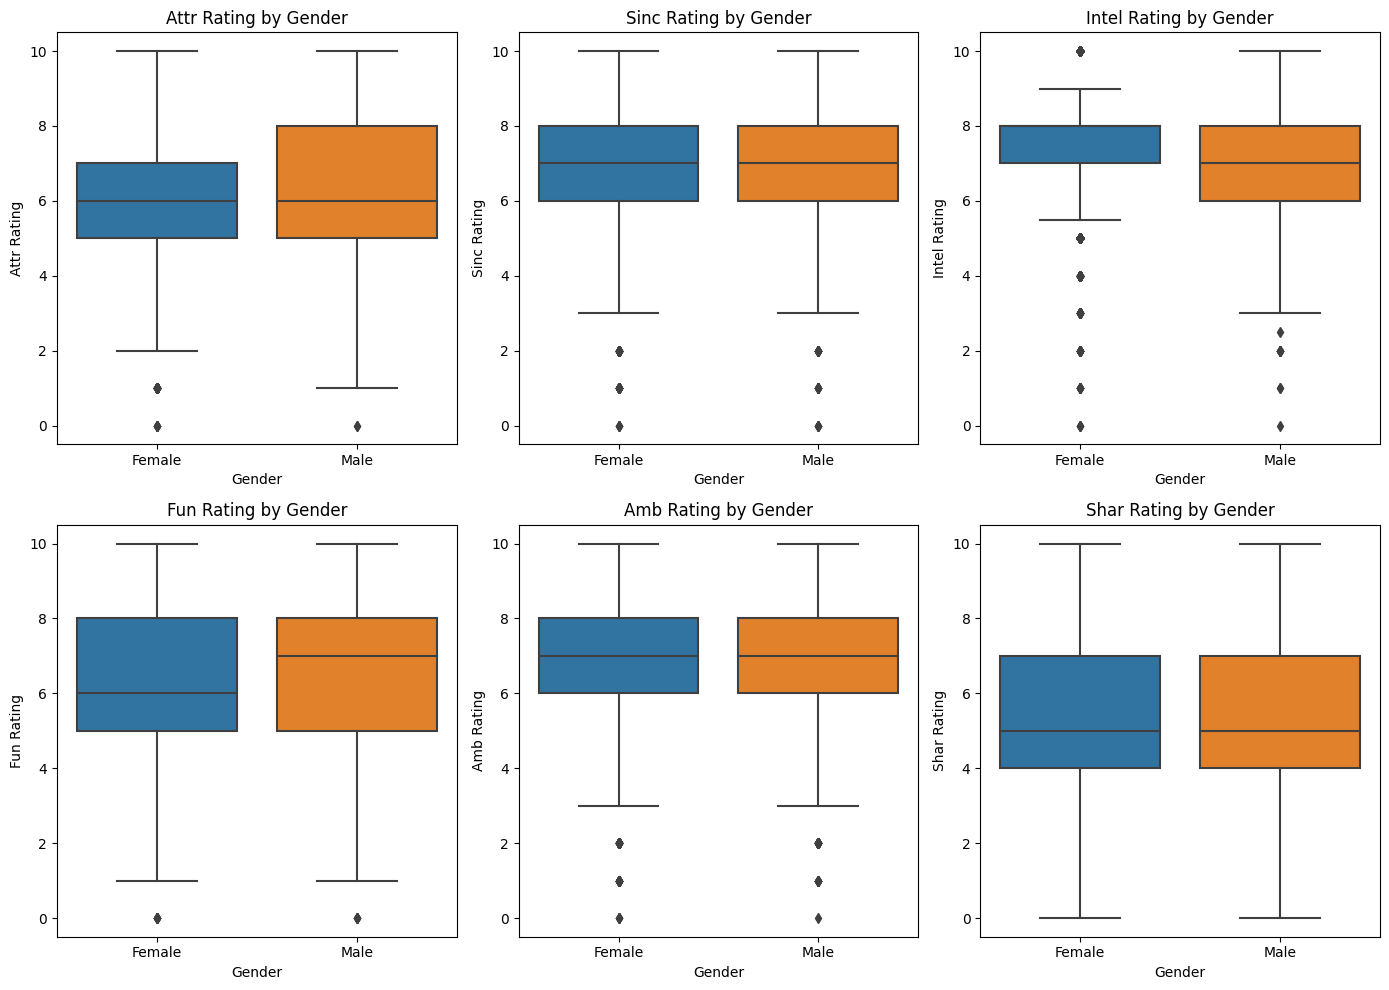

In [14]:
# Boxplot of Ratings by Gender
ratings = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

plt.figure(figsize=(14, 10))
for i, rating in enumerate(ratings, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='gender', y=rating, data=df)
    plt.title(f'{rating.capitalize()} Rating by Gender')
    plt.xlabel('Gender')
    plt.ylabel(f'{rating.capitalize()} Rating')
    plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

plt.tight_layout()
plt.show()

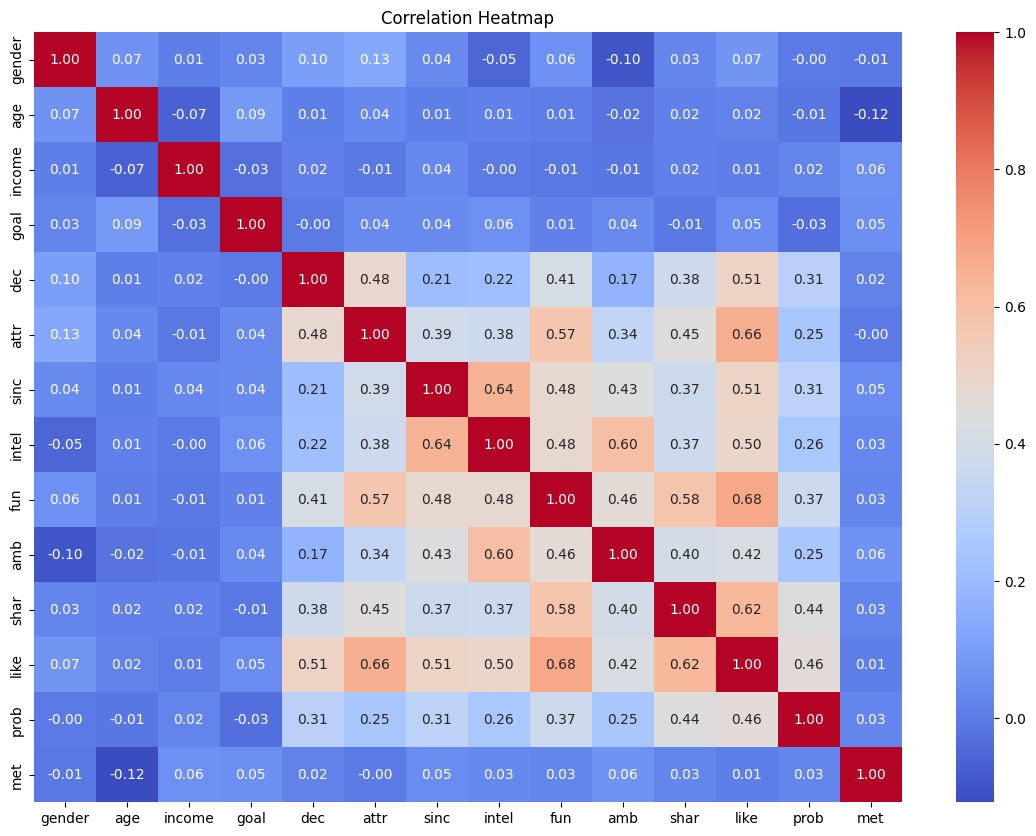

In [15]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Generate correlation matrix for numerical columns
corr_matrix = df[numerical_columns].corr()

# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()